Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Step 1: Loading dataset

In [2]:
dataset1 = pd.read_csv('data.csv')
dataset1

,x1,y
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233
...,...,...
92,5.8707,7.2029
93,5.3054,1.9869
94,8.2934,0.1445
95,13.3940,9.0551


Step 2: Define Features (X) and Labels (y)

(97,)


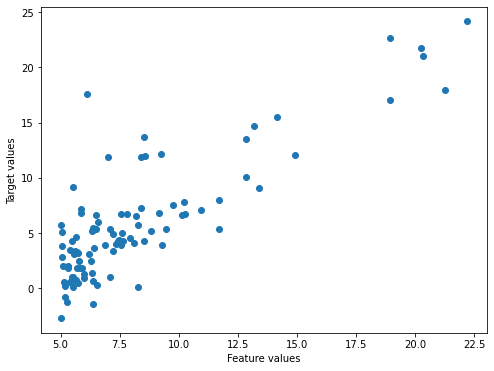

In [3]:
X = dataset1.iloc[:, 0].values
y = dataset1.iloc[:, 1].values

print(X.shape)

### Visualization of the dataset
plt.figure(figsize = (8, 6))
plt.scatter(X,y)
plt.ylabel('Target values')
plt.xlabel('Feature values')
plt.show()

Step 3: Preprocessing of the data and normalization

In [4]:
### Adding one column to the data

X = np.vstack((np.ones((X.size, )), X)).T
y = y.reshape(y.size, 1)

### Feature normalization

def feature_norm(X):
    myu = np.mean(X)
    sigma = np.std(X)
    diff = np.subtract(X, myu)
    X_norm = np.divide(diff, sigma)
    return X_norm

In [5]:
X_norm = feature_norm(X)
print(X_norm.shape)

(97, 2)


Step 4: Split the Dataset into tran and test datasets

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_norm,y,test_size = 0.1, random_state = 0)
y_train = y_train.reshape(len(y_train), 1)
y_test = y_test.reshape(len(y_test), 1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(87, 2)
(10, 2)
(87, 1)
(10, 1)


Step 5: Train the model

In [7]:
def model(X, y, learning_rate, iterations):
    m = y.size
    theta = np.zeros((2,1))
    cost_list = []
    for i in range(iterations):
        
        y_pred = np.dot(X, theta)
        cost = (1/(2*m)*np.sum(np.square(y_pred-y)))
        
        d_theta = (1/m)*np.dot(X.T, y_pred-y)
        theta = theta - learning_rate * d_theta
        cost_list.append(cost)
    return theta, cost_list

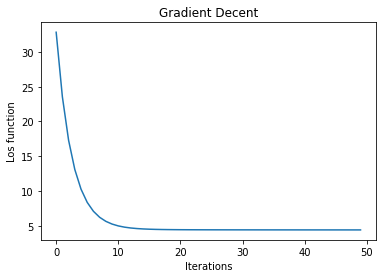

In [8]:
iterations = 50
learning_rate = 0.1
theta, cost_list = model(X_train, y_train, learning_rate = learning_rate, iterations = iterations)

rng = np.arange(0, iterations)
plt.plot(rng, cost_list)
plt.xlabel("Iterations")
plt.ylabel("Los function")
plt.title("Gradient Decent")
plt.show()

Step 6: Prediction

In [9]:
y_pred = np.dot(X_test, theta)
error = (1/X_test.shape[0])*np.sum(y_pred-y_test)

print('Test error is :', round(error, 4)*100, '%')
print('Test Accuracy is :', round(1-error, 4)*100, '%')

Test error is : 12.32 %
Test Accuracy is : 87.68 %
